# Predicting Arrhythmia through EKG and Patient Data

The EKG remains the gold standard for diagnostic of heart arrhythmia and ischemic attacks for patients experiencing cardiac symptoms. These could include chest pain, difficulty breathing, palpitations, and cardiac arrests. The protocol is to have an EKG measured and read within ten minutes of a patient's arrival to the emergency department, and in some cases, is repeated to monitor cardiac changes over time. 

Door to balloon time (DTBT) is an important performance measure for hospitals, and the target is to have the patient in the cathlab with balloon deployed within 90 minutes of arrival of the patient to the emergency room. The ability of prehospital care to transmit 12-lead EKGs has been instrumental in helping hospitals achieve this metric.

Despite the improvement in DTBT to less than 90 minutes, there was no significant decrease in in-hospital mortality rates from 83 to 67 minutes. However, recent studies show that DTBT of less than 30 minutes reduced in-hospital mortality rates to 0.7% from 12.5% of a DTBT of > 90 minutes, 11.7% from 61-90 minutes, and 5.0% from 31-60 minutes (p=0.041).

Thus, accurate classification of arrhythmia is crucial in triaging patients, providing appropriate and efficent treatment, and ultimately decreasing mortality rate of patients with MI. 

This dataset contains 452 patients with basic information such as patient height, weight, age, sex, and heart rate. It also contains data on their EKG including waveform characteristics such as peak intervals and intervals.




In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
%matplotlib inline

In [177]:
#Creating a plot to show differences in mortality rates based on time
mortalityx = ['<30', '31-60', '61-90', '>90']
mortalityx = ['>90', '61-90', '31-60', '<30']
mortalityy = [0.7, 5.0, 11.7, 12.5]
mortalityy = [12.5, 11.7, 5.0, 0.7]

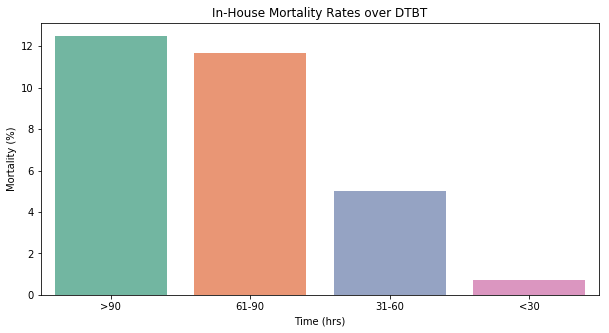

In [178]:
plt.figure(figsize=(10,5))
sns.barplot(x=mortalityx, y=mortalityy, palette='Set2')
plt.title('In-House Mortality Rates over DTBT')
plt.ylabel('Mortality (%)')
plt.xlabel('Time (hrs)')

plt.show()

In [28]:
df = pd.read_csv('arrhythmia2.csv', header=None)

In [29]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


In [30]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0,0.5,2.4,25.0,46.6,1
451,78,1,160,70,79,127,364,138,78,28,...,0.0,10.4,-1.8,0.0,0,0.5,1.6,21.3,32.8,1


In [31]:
# creating new dataframe with only measurable waveform features and the classification of arrhythmias
dft = df.iloc[:, :15]

In [32]:
dfvalues = df.iloc[:, 279]

In [33]:
dft2 = pd.concat([dft, dfvalues], axis=1)

In [34]:
dft2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,279
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,?,63,8
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,?,53,6
2,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75,10
3,55,0,175,94,100,202,380,179,143,28,11,-5,20,?,71,1
4,75,0,190,80,88,181,360,177,103,-16,13,61,3,?,?,7


In [35]:
# Adding feature labels to the columns
columns = ['age', 'sex', 'height', 'weight', 'qrs_int', 'pr_int', 'qt_int', 't_int', 'p_int', 'qrs', 'twave', 'pwave', 'qrst', 'jwave', 'hr', 'arrhythmia']

In [36]:
dft2.columns = columns

In [37]:
dft2.head()

,age,sex,height,weight,qrs_int,pr_int,qt_int,t_int,p_int,qrs,twave,pwave,qrst,jwave,hr,arrhythmia
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,?,63,8
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,?,53,6
2,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75,10
3,55,0,175,94,100,202,380,179,143,28,11,-5,20,?,71,1
4,75,0,190,80,88,181,360,177,103,-16,13,61,3,?,?,7


In [38]:
dft2.tail()

,age,sex,height,weight,qrs_int,pr_int,qt_int,t_int,p_int,qrs,twave,pwave,qrst,jwave,hr,arrhythmia
447,53,1,160,70,80,199,382,154,117,-37,4,40,-27,?,63,1
448,37,0,190,85,100,137,361,201,73,86,66,52,79,?,73,10
449,36,0,166,68,108,176,365,194,116,-85,-19,-61,-70,84,84,2
450,32,1,155,55,93,106,386,218,63,54,29,-22,43,103,80,1
451,78,1,160,70,79,127,364,138,78,28,79,52,47,?,75,1


In [39]:
dft2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 16 columns):
age           452 non-null int64
sex           452 non-null int64
height        452 non-null int64
weight        452 non-null int64
qrs_int       452 non-null int64
pr_int        452 non-null int64
qt_int        452 non-null int64
t_int         452 non-null int64
p_int         452 non-null int64
qrs           452 non-null int64
twave         452 non-null object
pwave         452 non-null object
qrst          452 non-null object
jwave         452 non-null object
hr            452 non-null object
arrhythmia    452 non-null int64
dtypes: int64(11), object(5)
memory usage: 56.6+ KB


In [40]:
# changing '?' strings to 0 numerical values
dft2.twave = dft2.twave.str.replace('?', '0')
dft2.pwave = dft2.pwave.str.replace('?', '0')
dft2.qrst = dft2.qrst.str.replace('?', '0')
dft2.jwave = dft2.jwave.str.replace('?', '0')
dft2.hr = dft2.hr.str.replace('?', '0')

In [41]:
# changing non numeric columns to numeric
dft2.twave = pd.to_numeric(dft2.twave, errors='coerce')
dft2.pwave = pd.to_numeric(dft2.pwave, errors='coerce')
dft2.qrst = pd.to_numeric(dft2.qrst, errors='coerce')
dft2.jwave = pd.to_numeric(dft2.jwave, errors='coerce')
dft2.hr = pd.to_numeric(dft2.hr, errors='coerce')

In [42]:
dft2.describe()

,age,sex,height,weight,qrs_int,pr_int,qt_int,t_int,p_int,qrs,twave,pwave,qrst,jwave,hr,arrhythmia
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,35.511062,46.533186,36.634956,-2.285398,74.298673,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,57.541019,30.499700,36.022190,52.128831,14.291135,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,-177.000000,-170.000000,-135.000000,-179.000000,0.000000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,13.000000,36.000000,12.000000,0.000000,65.000000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,41.000000,54.500000,40.000000,0.000000,72.000000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,63.000000,64.000000,62.000000,0.000000,81.000000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,179.000000,176.000000,166.000000,178.000000,163.000000,16.000000


In [197]:
dft2.describe().T

,count,mean,std,min,25%,50%,75%,max
age,451.0,46.407982,16.429846,0.000000,36.000000,47.000000,58.000000,83.000000
sex,451.0,0.552106,0.497830,0.000000,0.000000,1.000000,1.000000,1.000000
height,451.0,163.363636,12.114488,60.000000,160.000000,164.000000,170.000000,190.000000
weight,451.0,68.144124,16.599841,6.000000,59.000000,68.000000,78.500000,176.000000
qrs_int,451.0,88.922395,15.381395,55.000000,80.000000,86.000000,94.000000,188.000000
pr_int,451.0,155.095344,44.875504,0.000000,142.000000,157.000000,174.500000,524.000000
qt_int,451.0,367.223947,33.420765,232.000000,350.000000,367.000000,384.000000,509.000000
t_int,451.0,169.933481,35.671090,108.000000,148.000000,162.000000,179.000000,381.000000
p_int,451.0,89.975610,25.848049,0.000000,79.000000,91.000000,102.000000,205.000000
qrs,451.0,33.787140,45.421423,-172.000000,4.000000,40.000000,66.000000,169.000000


In [43]:
dft2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 16 columns):
age           452 non-null int64
sex           452 non-null int64
height        452 non-null int64
weight        452 non-null int64
qrs_int       452 non-null int64
pr_int        452 non-null int64
qt_int        452 non-null int64
t_int         452 non-null int64
p_int         452 non-null int64
qrs           452 non-null int64
twave         452 non-null int64
pwave         452 non-null int64
qrst          452 non-null int64
jwave         452 non-null int64
hr            452 non-null int64
arrhythmia    452 non-null int64
dtypes: int64(16)
memory usage: 56.6 KB


In [44]:
print(dft2.jwave.value_counts())

 0      376
 84       3
-157      2
-93       2
 169      2
-164      2
 103      2
-105      1
-90       1
 91       1
-95       1
-108      1
 86       1
-109      1
-112      1
-113      1
 114      1
-117      1
-118      1
-89       1
 13       1
-18       1
-121      1
-84       1
-124      1
 74       1
 62       1
-57       1
-44       1
-39       1
       ... 
-179      1
 178      1
 177      1
 176      1
 175      1
-169      1
-168      1
-167      1
-166      1
 164      1
-163      1
 161      1
 160      1
 154      1
-162      1
 153      1
-153      1
 151      1
-150      1
-148      1
 144      1
-144      1
 141      1
 139      1
-137      1
 132      1
-132      1
 128      1
-126      1
 123      1
Name: jwave, Length: 70, dtype: int64


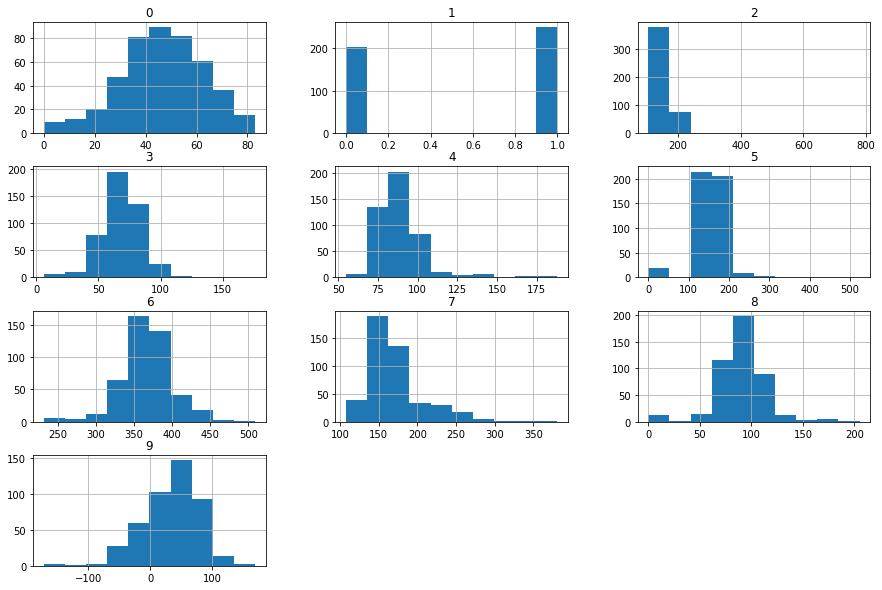

In [45]:
dft.hist(bins=10, figsize=(15, 10))
plt.show()

Some of the height data looks like it has unrealistic outliers. The p_int and pr_int having values close to or equal to zero may not be realistic either, but may also be possible. There is also an outlier in weight. Also a heart rate close to zero should be removed, that person is dead.

Negative values for the non-interval data is possible as it represents an opposite direction of motion of the heart, so it may not be irrelevant data.

Sex appears to be evenly distributed.

qrs_int, t_int, t_wave, pr_int may benefit from transformations.

In [46]:
# observing outliers
# appears to be height in mm, not cm.
dft2[dft2.height > 200]

,age,sex,height,weight,qrs_int,pr_int,qt_int,t_int,p_int,qrs,twave,pwave,qrst,jwave,hr,arrhythmia
141,1,1,780,6,85,165,237,150,106,88,30,30,52,0,138,5
316,0,0,608,10,83,126,232,128,60,125,21,-50,102,0,163,5


In [47]:
dft2[dft2.height < 140]

,age,sex,height,weight,qrs_int,pr_int,qt_int,t_int,p_int,qrs,twave,pwave,qrst,jwave,hr,arrhythmia
60,1,0,110,10,80,121,287,156,67,126,25,60,104,0,104,5
113,9,0,132,33,87,159,335,167,65,78,48,-6,62,0,78,1
198,13,1,133,30,96,176,356,171,137,102,-63,68,-10,-39,96,16
210,11,1,124,25,90,161,349,209,98,80,87,56,87,0,91,10
297,7,1,130,30,131,161,377,216,100,155,36,55,60,33,87,10
320,3,0,105,12,69,155,240,133,64,93,95,54,92,0,124,5
379,8,0,120,28,118,126,303,164,80,120,17,37,68,0,123,10
401,9,0,120,25,95,118,347,156,66,84,41,42,64,0,82,14
403,7,1,127,22,185,204,284,123,72,-172,24,176,166,13,122,5
424,7,0,119,21,140,157,438,226,81,-40,86,29,69,103,70,9


In [48]:
dft2[dft2.age == 0]

,age,sex,height,weight,qrs_int,pr_int,qt_int,t_int,p_int,qrs,twave,pwave,qrst,jwave,hr,arrhythmia
316,0,0,608,10,83,126,232,128,60,125,21,-50,102,0,163,5


In [49]:
dft2.at[(316),('height')] = 60.8
dft2.at[(141),('height')] = 78.0
# Changing height of infants in mm into cm

In [50]:
dft2[dft2.age == 0]

,age,sex,height,weight,qrs_int,pr_int,qt_int,t_int,p_int,qrs,twave,pwave,qrst,jwave,hr,arrhythmia
316,0,0,60,10,83,126,232,128,60,125,21,-50,102,0,163,5


In [51]:
dft2[dft2.age < 20]

,age,sex,height,weight,qrs_int,pr_int,qt_int,t_int,p_int,qrs,twave,pwave,qrst,jwave,hr,arrhythmia
5,13,0,169,51,100,167,321,174,91,107,66,52,88,0,84,14
60,1,0,110,10,80,121,287,156,67,126,25,60,104,0,104,5
86,19,0,165,50,96,151,373,147,102,68,175,72,82,-112,67,2
102,19,1,157,40,98,176,343,132,144,169,73,58,124,0,101,1
108,17,0,170,61,97,0,353,141,0,90,-92,0,92,-95,86,2
113,9,0,132,33,87,159,335,167,65,78,48,-6,62,0,78,1
141,1,1,78,6,85,165,237,150,106,88,30,30,52,0,138,5
146,18,0,175,60,102,135,379,167,73,91,38,61,69,0,62,10
149,17,1,160,54,85,137,323,143,87,72,29,78,50,0,93,10
167,19,1,156,47,80,137,342,243,92,-7,48,69,27,0,92,1


In [52]:
dft2[dft2.age < 20].value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [ ]:
# dft2 = dft2.drop(dft2[dft2.height > 200].index)
# biasing model if you're dropping your data

In [53]:
# dft2 = dft2.drop(dft2[dft2.height < 140].index)
# dropping potential pts with low age

In [54]:
dft2[dft2.weight > 150]

,age,sex,height,weight,qrs_int,pr_int,qt_int,t_int,p_int,qrs,twave,pwave,qrst,jwave,hr,arrhythmia
213,53,0,169,176,111,166,339,200,100,86,-52,77,69,-57,74,2


In [55]:
# dft2 = dft2.drop(dft2[dft2.weight > 150].index)

In [56]:
dft2[dft2.p_int < 50]

,age,sex,height,weight,qrs_int,pr_int,qt_int,t_int,p_int,qrs,twave,pwave,qrst,jwave,hr,arrhythmia
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,0,53,6
56,38,1,160,63,79,0,376,165,0,34,14,55,26,-93,70,1
106,46,0,165,55,82,0,415,108,0,-1,70,0,12,0,63,6
108,17,0,170,61,97,0,353,141,0,90,-92,0,92,-95,86,2
174,55,1,156,78,88,0,380,138,0,79,73,0,76,-108,71,15
217,66,1,160,60,73,0,364,144,0,27,-27,0,1,-153,81,15
219,77,0,165,77,98,0,359,149,0,79,-123,0,85,0,59,16
243,49,1,166,87,78,0,322,122,0,70,-103,0,66,0,115,15
298,12,1,165,47,91,0,359,152,0,8,14,0,10,0,68,10
300,59,0,165,65,121,0,329,160,0,66,-51,0,-4,-87,75,15


Although the p_int, pr_int are zero, they correspond to a pwave of 0 (which makes sense). If a pwave is not seen on the EKG, there would be no p or pr interval.

In [57]:
dft2[dft2.hr < 40]

,age,sex,height,weight,qrs_int,pr_int,qt_int,t_int,p_int,qrs,twave,pwave,qrst,jwave,hr,arrhythmia
4,75,0,190,80,88,181,360,177,103,-16,13,61,3,0,0,7


In [58]:
dft2 = dft2.drop(dft2[dft2.hr < 40].index)

In [59]:
#dft = dft.drop(dft[dft.pr_int > 400].index)

In [60]:
#dff = df.iloc[:, 0:14]
#dff.columns = columns

In [61]:
#print(dff[dff.hr == '?'])

In [62]:
print(dft2[dft2.jwave == '?'])

Empty DataFrame
Columns: [age, sex, height, weight, qrs_int, pr_int, qt_int, t_int, p_int, qrs, twave, pwave, qrst, jwave, hr, arrhythmia]
Index: []


/Users/swang/anaconda3/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [63]:
dft.describe()

,0,1,2,3,4,5,6,7,8,9
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000


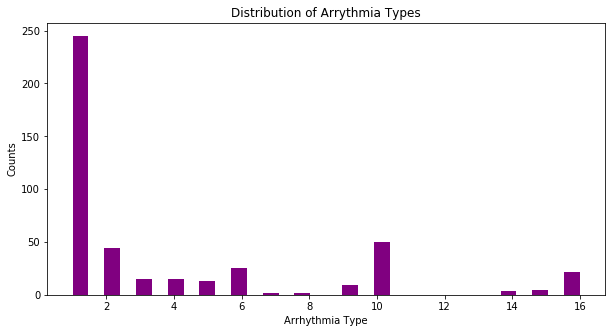

In [64]:
plt.figure(figsize=(10,5))
plt.hist(dft2.arrhythmia, bins=32, color='purple')
plt.title("Distribution of Arrythmia Types")
plt.xlabel('Arrhythmia Type')
plt.ylabel('Counts')
plt.show()

In [65]:
dft2.jwave = np.where(dft2.jwave == 0, 0, 1)

Unfortunately our data is skewed to which no arrhythmia (1) has many more samples compared to the various other types of arrhythmias (2-16). Let's change it so that (0) represents no arrhythmia and (1) represents a collection of all arrhythmias.

Listed are:
1. Normal
2. Coronary Artery Disease
3. Old Anterior MI
4. Old Inferior MI
5. Sinus tachycardia
6. Sinus bradycardia
7. Premature Ventricular Contractions
8. Premature Supraventricular Contractions
9. Left Bundle Branch Block
10. Right Bundle Branch Block
11. 1st degree Atrioventricular (AV) Block
12. 2nd degree AV Block
13. 3rd degree AV Block
14. Left ventricular hypertrophy
15. Atrial fibrillation or flutter
16. All others

In [66]:
dft2.describe()

,age,sex,height,weight,qrs_int,pr_int,qt_int,t_int,p_int,qrs,twave,pwave,qrst,jwave,hr,arrhythmia
count,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000
mean,46.407982,0.552106,163.363636,68.144124,88.922395,155.095344,367.223947,169.933481,89.975610,33.787140,35.560976,46.501109,36.709534,0.168514,74.463415,3.873614
std,16.429846,0.497830,12.114488,16.599841,15.381395,44.875504,33.420765,35.671090,25.848049,45.421423,57.595121,30.525936,36.027241,0.374738,13.870684,4.409534
min,0.000000,0.000000,60.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,-177.000000,-170.000000,-135.000000,0.000000,44.000000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,4.000000,13.000000,36.000000,12.000000,0.000000,65.000000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,41.000000,54.000000,40.000000,0.000000,72.000000,1.000000
75%,58.000000,1.000000,170.000000,78.500000,94.000000,174.500000,384.000000,179.000000,102.000000,66.000000,63.000000,64.000000,62.000000,0.000000,81.000000,6.000000
max,83.000000,1.000000,190.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,179.000000,176.000000,166.000000,1.000000,163.000000,16.000000


In [67]:
# LaTeX equation
dft2['qtc'] = dft2['qt_int']/((60/dft2['hr'])**(1/2))
# add equations to show

In [68]:
dft2['bmi'] = dft2['weight']/((dft2['height']/100)**2)

In [69]:
dft2.arrhythmia = np.where(dft2.arrhythmia > 1, 1, 0)

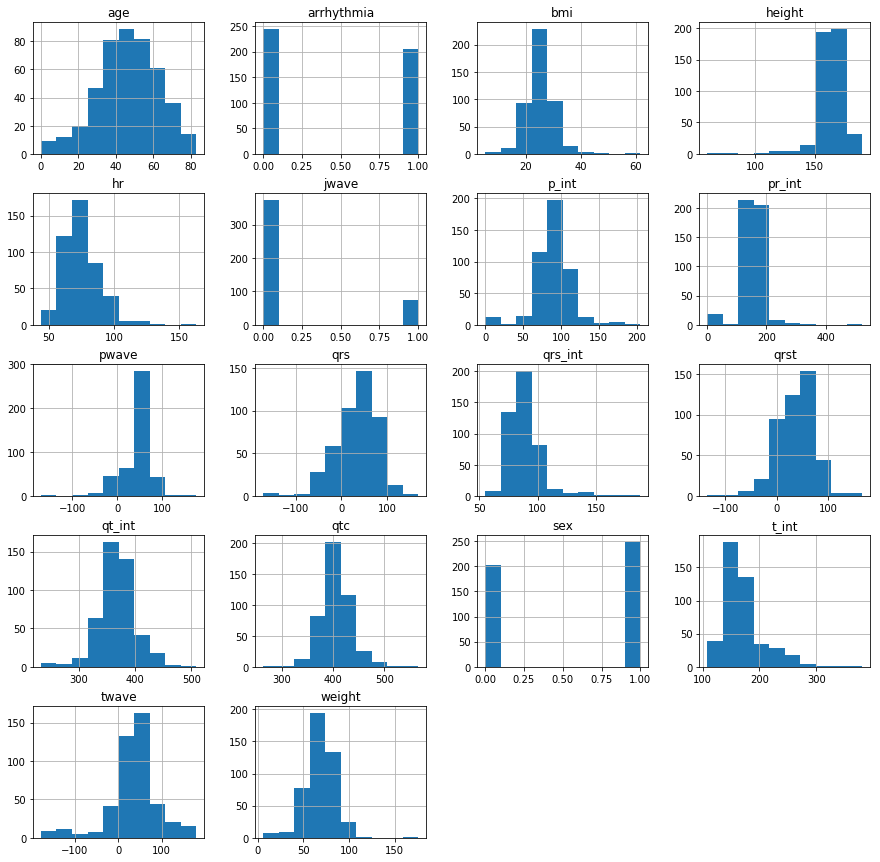

In [183]:
dft2.hist(bins=10, figsize=(15, 15))
plt.title('Dataset Distributions')
plt.show()

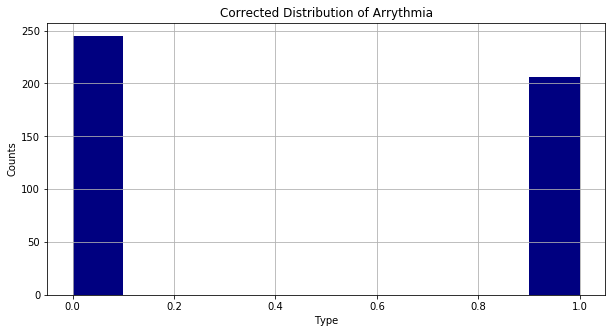

In [181]:
plt.figure(figsize=(10,5))
dft2.arrhythmia.hist(color='navy')
plt.title('Corrected Distribution of Arrythmia')
plt.ylabel('Counts')
plt.xlabel('Type')
plt.show()

## 2) Splitting Data into Features and Labels

In [72]:
#Must use .values to turn the featuers and labels into numpy arrays for scikit learn
X = dft2.drop(labels=['arrhythmia'], axis=1).values
y = dft2.arrhythmia.values

In [73]:
print(dft2.arrhythmia.head())

0    1
1    1
2    1
3    0
5    1
Name: arrhythmia, dtype: int64


## 3) Splitting Data into Training and Test Datasets

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

In [75]:
X_train

array([[ 38.        ,   1.        , 170.        , ...,  93.        ,
        419.56161645,  32.87197232],
       [ 57.        ,   1.        , 166.        , ...,  66.        ,
        418.47473042,  26.12861083],
       [ 52.        ,   0.        , 174.        , ...,  74.        ,
        394.24717289,  27.08415907],
       ...,
       [ 49.        ,   1.        , 166.        , ...,  71.        ,
        379.64612909,  22.4996371 ],
       [ 62.        ,   0.        , 176.        , ...,  64.        ,
        452.36445484,  23.56663223],
       [ 47.        ,   0.        , 175.        , ...,  93.        ,
        418.31662649,  30.69387755]])

In [76]:
X_test

array([[  8.        ,   0.        , 120.        , ..., 123.        ,
        433.82997822,  19.44444444],
       [ 40.        ,   1.        , 160.        , ...,  82.        ,
        409.16581806,  29.296875  ],
       [ 67.        ,   0.        , 171.        , ...,  81.        ,
        407.82514636,  22.91303307],
       ...,
       [ 42.        ,   1.        , 165.        , ...,  66.        ,
        394.35212691,  19.83471074],
       [ 48.        ,   1.        , 156.        , ...,  74.        ,
        427.56383539,  25.47666009],
       [ 59.        ,   0.        , 174.        , ...,  63.        ,
        386.31004388,  24.44180209]])

In [77]:
y_train

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,

## 4) Feature Scaling

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [79]:
corr_matrix = dft2.corr()
corr_matrix['arrhythmia'].sort_values(ascending=False)

arrhythmia    1.000000
qrs_int       0.329691
jwave         0.229340
t_int         0.214709
hr            0.099444
qtc           0.051748
age           0.008938
qt_int        0.000782
twave        -0.013351
qrst         -0.021419
bmi          -0.033580
weight       -0.034547
pr_int       -0.051601
pwave        -0.056966
height       -0.066546
qrs          -0.072124
p_int        -0.095333
sex          -0.221400
Name: arrhythmia, dtype: float64

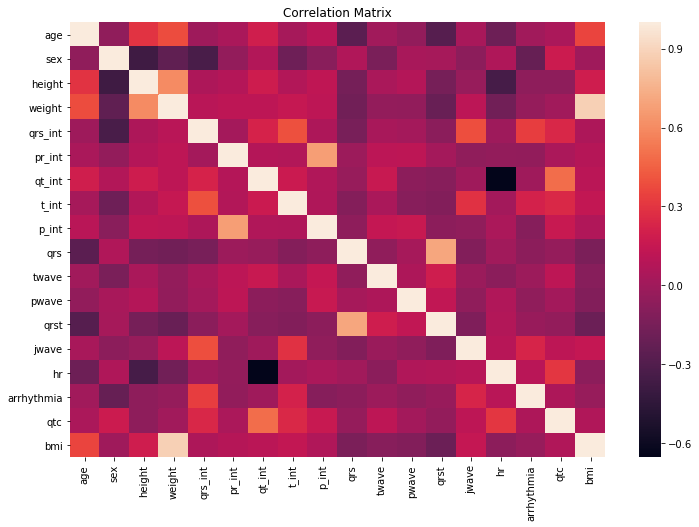

In [80]:
import seaborn as sns
plt.figure(figsize=(12,8))
plt.title('Correlation Matrix')
sns.heatmap(corr_matrix)
plt.show()
# Box plots to look how features split among arrhythmia and not
# feature importance, which provides most info across all variables
    # can reduce feature set for those that aren't important
    # drop some correlated features to see if it affects accuracy

In [81]:
print(corr_matrix)

                 age       sex    height    weight   qrs_int    pr_int  \
age         1.000000 -0.055041  0.294884  0.380295 -0.003814  0.039075   
sex        -0.055041  1.000000 -0.383041 -0.246827 -0.337709 -0.045433   
height      0.294884 -0.383041  1.000000  0.600682  0.052363  0.076023   
weight      0.380295 -0.246827  0.600682  1.000000  0.100246  0.119024   
qrs_int    -0.003814 -0.337709  0.052363  0.100246  1.000000  0.021916   
pr_int      0.039075 -0.045433  0.076023  0.119024  0.021916  1.000000   
qt_int      0.197191  0.071622  0.180441  0.119072  0.218665  0.079681   
t_int       0.024977 -0.184509  0.071273  0.149765  0.397480  0.074395   
p_int       0.098173 -0.079945  0.123723  0.119972  0.049763  0.670657   
qrs        -0.262884  0.066926 -0.161493 -0.171948 -0.146383 -0.011030   
twave       0.007395 -0.140489  0.039340 -0.046469  0.031666  0.113460   
pwave      -0.051248  0.033227  0.077637 -0.052413  0.023293  0.117736   
qrst       -0.283087  0.029157 -0.1564

#### Correlations
There appears to be moderate positive correlations with:
1. height and age
2. weight and age
3. arrhythmia and QRS interval
4. T interval and QRS interval
5. T interva and J waves

Stronger positive correlations with:
1. weight and height
2. P interval and PR interval
3. QRS with QRST

And negative correlations with:
1. Height and sex
2. Weight and sex
3. QRS interval and sex
4. QRS/QRST with age
5. Heart rate with QT interval
6. Height and heart rate

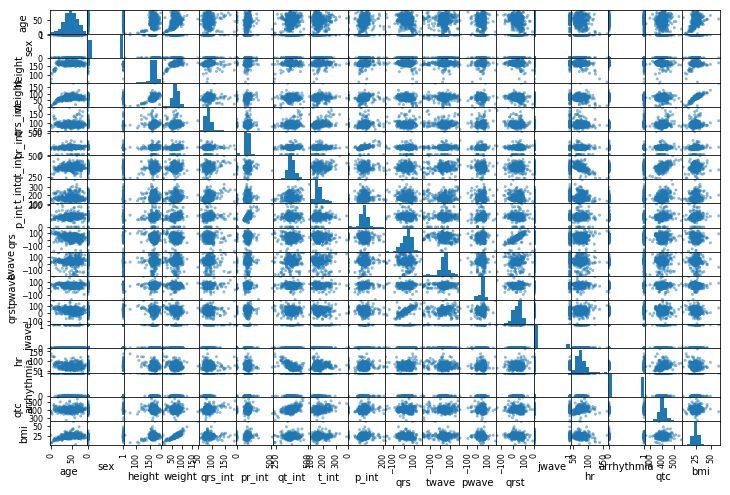

In [82]:
from pandas.plotting import scatter_matrix
attributes = dft2.columns
scatter_matrix(dft2[attributes], figsize=(12, 8))
plt.show()

Text(0.5, 1.0, 'QRS vs QRST interval')

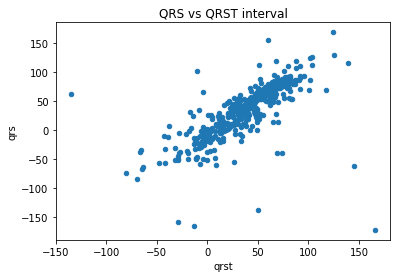

In [83]:
dft2.plot(kind='scatter', x='qrst', y='qrs')
plt.title('QRS vs QRST interval')

Text(0.5, 1.0, 'P vs PR interval')

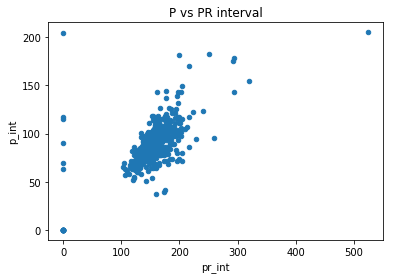

In [84]:
dft2.plot(kind='scatter', x='pr_int', y='p_int')
plt.title('P vs PR interval')

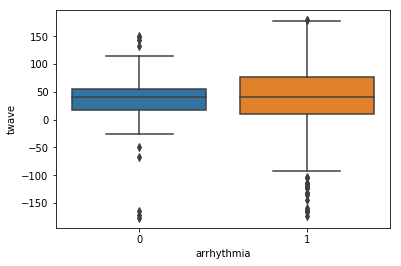

In [85]:
sns.boxplot(y='twave', data=dft2, x='arrhythmia')

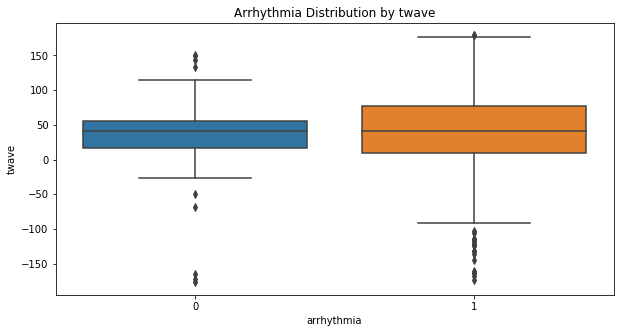

In [86]:
plt.figure(figsize=(10,5))
sns.boxplot(y='twave', x='arrhythmia', data=dft2)
plt.title('Arrhythmia Distribution by twave')
plt.show()

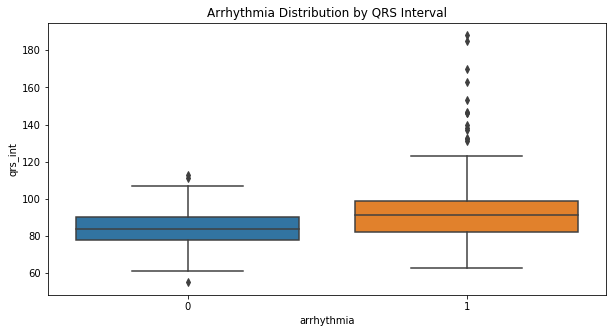

In [87]:
plt.figure(figsize=(10,5))
sns.boxplot(y='qrs_int', x='arrhythmia', data=dft2)
plt.title('Arrhythmia Distribution by QRS Interval')
plt.show()

Text(0.5, 1.0, 'Weight of individuals with or without Arrhythmia')

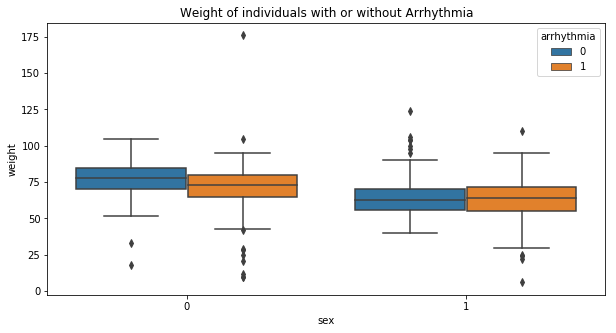

In [175]:
plt.figure(figsize=(10,5))
sns.boxplot(y='weight', x='sex', data=dft2, hue='arrhythmia')
plt.title('Weight of individuals with or without Arrhythmia')

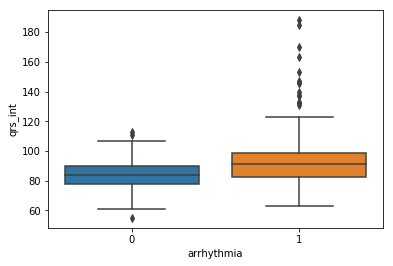

In [89]:
sns.boxplot(y='qrs_int', x='arrhythmia', data=dft2)

## 6) Modeling

First lets create a way to record accuracy scores of the various models

In [90]:
from sklearn.model_selection import cross_val_score
models = ['Naive Bayes', 'KNN', 'Decision Tree', 'Random Forest', 'SVM']
scores = []

In [91]:
print(scores)

[]


## Naive Bayes Classification

In [92]:
# Naive Bayes?
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [93]:
y_predgnb = gnb.predict(X_test)

In [94]:
from sklearn.metrics import accuracy_score
gnbacc = accuracy_score(y_test, y_predgnb)
print(gnbacc)
scores.append(gnbacc)

0.7252747252747253


In [95]:
gnbcv = cross_val_score(gnb, X, y, cv=5)
print(gnbcv)

[0.65934066 0.62222222 0.71111111 0.74444444 0.78888889]


With an accuracy of 72.5%, it appears that Naive Bayes is doing a rather good job of modeling arrhythmia, but variance of when using cross validation seems to be rather high.

In [96]:
CV = pd.DataFrame(data=[1, 2, 3, 4, 5])
gnbcvdf = pd.DataFrame(data=gnbcv)

In [97]:
gnbcvbar = pd.concat([CV, gnbcvdf], axis=1)

In [98]:
gnbcvbar.columns = ['CV segment', 'CV score']

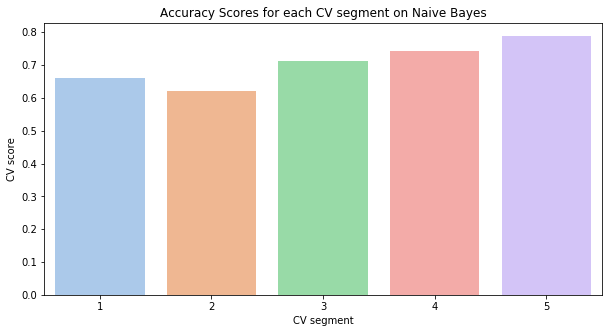

In [187]:
plt.figure(figsize=(10,5))
sns.barplot(x='CV segment', y='CV score', data=gnbcvbar, palette='pastel')

plt.title('Accuracy Scores for each CV segment on Naive Bayes')
plt.show()

We will investigate this further when we do cross validation for all models and compare variances between each model as opposed to just accuracy. Variances in CV scores could mean that there is some overfitting.

## KNN Classifier

In [100]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [101]:
y_pred = classifier.predict(X_test)

In [102]:
from sklearn.metrics import accuracy_score
knnacc = accuracy_score(y_test, y_pred)
print(knnacc)
scores.append(knnacc)

0.6373626373626373


In [103]:
knncv = cross_val_score(classifier, X, y, cv=5)
print(knncv)

[0.64835165 0.67777778 0.64444444 0.66666667 0.7       ]


In [104]:
type(y_pred)

numpy.ndarray

In [105]:
type(y_test)

numpy.ndarray

In [106]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[45  6]
 [27 13]]


In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.88      0.73        51
           1       0.68      0.33      0.44        40

   micro avg       0.64      0.64      0.64        91
   macro avg       0.65      0.60      0.59        91
weighted avg       0.65      0.64      0.60        91



In [108]:
print(y_pred)

[1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [109]:
print(y_test)

[1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1
 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 1 1 0
 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0]


In [110]:
error=[]

for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

In [111]:
print(error)

[0.32967032967032966, 0.3626373626373626, 0.3516483516483517, 0.34065934065934067, 0.31868131868131866, 0.34065934065934067, 0.34065934065934067, 0.34065934065934067, 0.32967032967032966, 0.32967032967032966, 0.3516483516483517, 0.32967032967032966, 0.34065934065934067, 0.32967032967032966, 0.32967032967032966, 0.32967032967032966, 0.32967032967032966, 0.32967032967032966, 0.31868131868131866, 0.31868131868131866, 0.2967032967032967, 0.2967032967032967, 0.3076923076923077, 0.31868131868131866, 0.31868131868131866, 0.3516483516483517, 0.31868131868131866, 0.34065934065934067, 0.31868131868131866]


In [112]:
from sklearn.neighbors import KNeighborsClassifier
classifierknn = KNeighborsClassifier(n_neighbors=2)
classifierknn.fit(X_train, y_train)
y_predsk = classifierknn.predict(X_test)
print(accuracy_score(y_predsk, y_test))

0.6373626373626373


In [113]:
knncv2 = cross_val_score(classifierknn, X, y, cv=5)
print(knncv2)

[0.64835165 0.67777778 0.64444444 0.66666667 0.7       ]


## Decision Tree Classifier

In [114]:
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(
    criterion='gini',
    random_state=100,
    max_depth=3,
    min_samples_leaf=5
    )
classifier2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [115]:
y_pred2 = classifier2.predict(X_test)
dtacc = accuracy_score(y_pred2, y_test)
print(dtacc)
scores.append(dtacc)

0.6263736263736264


In [116]:
dtcv = cross_val_score(classifier2, X_train, y_train, cv=5)
print(dtcv)

[0.67123288 0.75       0.68055556 0.65277778 0.73239437]


In [117]:
print(accuracy_score(y_pred2, y_test))

0.6263736263736264


### Random Forest Classifier

In [118]:
from sklearn import ensemble
classifier3 = ensemble.RandomForestClassifier(
    n_estimators=5,
    random_state=100,
    max_depth=3,
    min_samples_split=4,
    min_samples_leaf=10
    )
classifier3.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [119]:
y_pred3 = classifier3.predict(X_test)
rfacc = accuracy_score(y_pred3, y_test)
scores.append(rfacc)

In [120]:
print(rfacc)

0.6593406593406593


In [121]:
rfcv = cross_val_score(classifier3, X, y, cv=5)
print(rfcv)

[0.64835165 0.7        0.64444444 0.71111111 0.65555556]


In [122]:
print(accuracy_score(y_pred3, y_test))

0.6593406593406593


In [123]:
ytestpred = classifier3.predict(X_test)
print(accuracy_score(ytestpred, y_test))
#run grid search to see where max is

0.6593406593406593


In [124]:
print(cross_val_score(classifier3, X_train, y_train, cv=5))

[0.68493151 0.75       0.70833333 0.66666667 0.76056338]


### Determining Feature Importance of Random Forest

In [125]:
xcolumns = dft2.columns.drop(labels='arrhythmia')

In [126]:
feature_importances = pd.DataFrame(classifier3.feature_importances_, index=xcolumns, columns=['importance']).sort_values('importance', ascending=False)

In [127]:
print(feature_importances)

         importance
qrs_int    0.202762
twave      0.151603
hr         0.149920
t_int      0.126296
qt_int     0.104859
jwave      0.077393
qrst       0.050282
qrs        0.045214
qtc        0.041340
p_int      0.023927
pr_int     0.017968
bmi        0.008299
pwave      0.000138
sex        0.000000
weight     0.000000
height     0.000000
age        0.000000


In [128]:
feature_importances.index[0]

'qrs_int'

In [129]:
dft3 = dft2.drop(labels=['age', 'height', 'weight', 'sex', 'pwave', 'bmi'], axis=1)

In [130]:
X3 = dft3.drop(labels='arrhythmia', axis=1).values
y3 = dft3.arrhythmia.values
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.20, random_state=5)

In [131]:
scaler.fit(X3_train)
X3_train = scaler.transform(X3_train)
X3_test = scaler.transform(X3_test)

In [132]:
classifier3new = ensemble.RandomForestClassifier(
    n_estimators=5,
    random_state=100,
    max_depth=3,
    min_samples_split=4,
    min_samples_leaf=10
    )
classifier3new.fit(X3_train, y3_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [133]:
y_pred3new = classifier3new.predict(X3_test)

In [134]:
print(accuracy_score(y_pred3new, y3_test))

0.6593406593406593


In [135]:
print(cross_val_score(classifier3new, X_train, y_train, cv=5))

[0.68493151 0.75       0.70833333 0.66666667 0.76056338]


Amazing, we still have fantastic accuracy after reducing the amount of features.

### Linear SVM

In [136]:
from sklearn.svm import SVC
classifiersvm = SVC(kernel='linear')
classifiersvm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [137]:
y_pred4 = classifiersvm.predict(X_test)
svmacc = accuracy_score(y_pred4, y_test)
print(svmacc)
scores.append(svmacc)

0.6593406593406593


In [138]:
lsvmcv = cross_val_score(classifiersvm, X, y, cv=5)
print(lsvmcv)

[0.67032967 0.66666667 0.65555556 0.76666667 0.82222222]


## Model evaluation and analysis

In [139]:
print('The result of all accuracy scores are:\n' + str(scores))

The result of all accuracy scores are:
[0.7252747252747253, 0.6373626373626373, 0.6263736263736264, 0.6593406593406593, 0.6593406593406593]


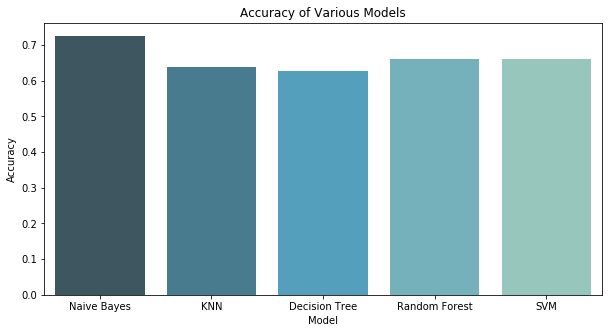

In [172]:
plt.figure(figsize=(10,5))
sns.barplot(x=models, y=scores, palette='GnBu_d')
plt.title('Accuracy of Various Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

It appears that Naive Bayes is the most accurate model, but I'd like to see what the variance of each model are.

In [141]:
cvscores = {'Naive Bayes':gnbcv,
           'KNN':knncv,
           'Decition Tree':dtcv,
           'Random Forest':rfcv,
           'SVM':lsvmcv
           }

In [142]:
cvscoredf = pd.DataFrame.from_dict(cvscores)

In [143]:
cvscoredf

,Naive Bayes,KNN,Decition Tree,Random Forest,SVM
0,0.659341,0.648352,0.671233,0.648352,0.670330
1,0.622222,0.677778,0.750000,0.700000,0.666667
2,0.711111,0.644444,0.680556,0.644444,0.655556
3,0.744444,0.666667,0.652778,0.711111,0.766667
4,0.788889,0.700000,0.732394,0.655556,0.822222


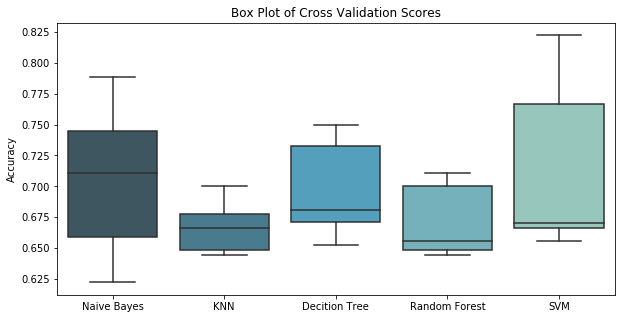

In [173]:
plt.figure(figsize=(10,5))
sns.boxplot(data=cvscoredf, palette='GnBu_d')
plt.title('Box Plot of Cross Validation Scores')
plt.ylabel('Accuracy')
plt.show()

## Hyperparameter Tuning for Random Forest

In [145]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [5, 6, 7, 8, 9], 'max_features': [4, 6, 8, 10], 'random_state': [100, 200, 300],
    'max_depth':[7, 9, 11], 'min_samples_split': [2, 3, 4], 'min_samples_leaf':[6, 8, 10]}
]

rfclassifier = ensemble.RandomForestClassifier()

grid_search = GridSearchCV(rfclassifier, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X3, y3)

/Users/swang/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [5, 6, 7, 8, 9], 'max_features': [4, 6, 8, 10], 'random_state': [100, 200, 300], 'max_depth': [7, 9, 11], 'min_samples_split': [2, 3, 4], 'min_samples_leaf': [6, 8, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [146]:
grid_search.best_params_

{'max_depth': 9,
 'max_features': 10,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'n_estimators': 5,
 'random_state': 200}

In [147]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=200, verbose=0, warm_start=False)

In [148]:
classifierRFbest = ensemble.RandomForestClassifier(
    n_estimators=5,
    random_state=200,
    max_depth=9,
    max_features=10,
    min_samples_split=2,
    min_samples_leaf=6
    )
classifierRFbest.fit(X3_train, y3_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=200, verbose=0, warm_start=False)

In [149]:
y_predRFbest = classifierRFbest.predict(X3_test)

In [150]:
scoreFE_RF = accuracy_score(y_predRFbest, y3_test)
print(scoreFE_RF)

0.6153846153846154


In [151]:
#confusion matrix
print(confusion_matrix(y_predRFbest, y3_test))

[[30 14]
 [21 26]]


In [152]:
CVscoreFE_RF = cross_val_score(classifierRFbest, X3, y3, cv=5)
print(CVscoreFE_RF)

[0.81318681 0.77777778 0.73333333 0.76666667 0.75555556]


## Rerunning Dataset through other models with less features (Based on Feature Importance)

In [153]:
# 1. Naive Bayes feature engineering, with CV

nbbest_classifier = GaussianNB()
nbbest_classifier.fit(X3_train, y3_train)

y_pred_nbbest = nbbest_classifier.predict(X3_test)

scoreFE_NB = accuracy_score(y_pred_nbbest, y3_test)
print(scoreFE_NB)

CVscoreFE_NB = cross_val_score(nbbest_classifier, X3, y3, cv=5)
print(CVscoreFE_NB)

0.7142857142857143
[0.67032967 0.67777778 0.71111111 0.77777778 0.76666667]


In [196]:
nbbest_classifier = GaussianNB()
nbbest_classifier.fit(X3_train, y3_train)

# read up and see what var_smoothing does

GaussianNB(priors=None, var_smoothing=1e-09)

In [154]:
print(confusion_matrix(y_pred_nbbest, y3_test))

[[43 18]
 [ 8 22]]


In [155]:
# 2. KNN feature engineered, with CV

knnbest_classifier = KNeighborsClassifier(n_neighbors=5)
knnbest_classifier.fit(X3_train, y3_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [156]:
# 2a. KNN parameter search
knn_param_grid = [
    {'leaf_size': [10, 20, 30, 40, 50], 'n_neighbors': [2, 3, 4, 5, 6, 7]}
]

knn_grid_search = GridSearchCV(knnbest_classifier, knn_param_grid, cv=5, scoring='accuracy')

knn_grid_search.fit(X3, y3)

knn_grid_search.best_params_

{'leaf_size': 10, 'n_neighbors': 5}

In [157]:
# 2b. KNN prediction based on pest parameters
knnbest_classifier = KNeighborsClassifier(n_neighbors=5, leaf_size=10)
knnbest_classifier.fit(X3_train, y3_train)

y_pred_knnbest = knnbest_classifier.predict(X3_test)

scoreFE_KNN = accuracy_score(y_pred_knnbest, y3_test)
print(scoreFE_KNN)

CVscoreFE_KNN = cross_val_score(knnbest_classifier, X3, y3, cv=5)
print(CVscoreFE_KNN)

0.6483516483516484
[0.62637363 0.66666667 0.68888889 0.7        0.68888889]


In [158]:
print(confusion_matrix(y_pred_knnbest, y3_test))

[[43 24]
 [ 8 16]]


In [159]:
# 3. Decision Tree, with feature engineering and CV
dtbest_classifier = DecisionTreeClassifier()
classifier2.fit(X3_train, y3_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [160]:
# 3a. Parameter Search
dt_param_grid = [
    {'random_state':[200, 300, 400, 500], 'max_depth':[1, 3, 5, 7, 9], 'min_samples_leaf':[1, 3, 5, 7, 9]}
]

dt_grid_search = GridSearchCV(dtbest_classifier, dt_param_grid, cv=5, scoring='accuracy')

dt_grid_search.fit(X3, y3)

dt_grid_search.best_params_

/Users/swang/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_depth': 5, 'min_samples_leaf': 7, 'random_state': 400}

In [161]:
# 3b. DT with best params
dtbest_classifier = DecisionTreeClassifier(
    max_depth=5,
    min_samples_leaf=7,
    random_state=400
)
dtbest_classifier.fit(X3_train, y3_train)

y_pred_dtbest = dtbest_classifier.predict(X3_test)

scoreFE_DT = accuracy_score(y_pred_dtbest, y3_test)
CVscoreFE_DT = cross_val_score(dtbest_classifier, X3, y3, cv=5)

print(scoreFE_DT)
print(CVscoreFE_DT)

0.6153846153846154
[0.78021978 0.74444444 0.63333333 0.7        0.67777778]


In [162]:
print(confusion_matrix(y_pred_dtbest, y3_test))

[[33 17]
 [18 23]]


In [163]:
# 4. Random Forest (done earlier)
print(scoreFE_RF)
print(CVscoreFE_RF)

print(confusion_matrix(y_predRFbest, y3_test))

0.6153846153846154
[0.81318681 0.77777778 0.73333333 0.76666667 0.75555556]
[[30 14]
 [21 26]]


In [164]:
# 5. Linear SVM, with engineered features and CV
svcbest_classifier = SVC(kernel='linear')
svcbest_classifier.fit(X3_train, y3_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [190]:
# 5a. Hyperparameter Search
svc_param_grid = [
    {'C':[0.5, 1, 2, 4], 'degree':[2, 3, 4], 'tol':[0.01, 0.001, 0.0005]}
]

svc_grid_search = GridSearchCV(svcbest_classifier, svc_param_grid, cv=5, scoring='accuracy')

svc_grid_search.fit(X3, y3)

svc_grid_search.best_params_

{'C': 0.5, 'degree': 2, 'tol': 0.01}

In [191]:
# 5b. Running with Best hyperparameters
svcbest_classifier = SVC(kernel='linear', C=0.5, degree=2, tol=0.01)
svcbest_classifier.fit(X3_train, y3_train)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.01, verbose=False)

In [192]:
y_pred_svcbest = svcbest_classifier.predict(X3_test)

scoreFE_SVC = accuracy_score(y_pred_svcbest, y3_test)
CVscoreFE_SVC = cross_val_score(svcbest_classifier, X3, y3, cv=5)

print(scoreFE_SVC)
print(CVscoreFE_SVC)

0.6703296703296703
[0.7032967  0.7        0.68888889 0.74444444 0.83333333]


In [193]:
print(confusion_matrix(y_pred_svcbest, y3_test))

[[40 19]
 [11 21]]


## Evaluation of Feature Engineered Models

In [213]:
cvscoresFE = {'Naive Bayes':CVscoreFE_NB,
           'KNN':CVscoreFE_KNN,
           'Decision Tree':CVscoreFE_DT,
           'Random Forest':CVscoreFE_RF,
           'SVM':CVscoreFE_SVC
           }

In [215]:
df_CVscoreFE = pd.DataFrame.from_dict(cvscoresFE)

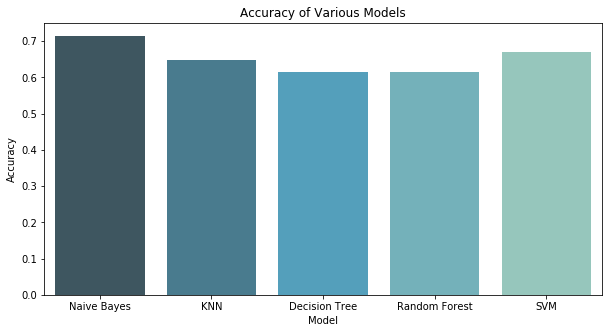

In [194]:
scoresFE = [scoreFE_NB, scoreFE_KNN, scoreFE_DT, scoreFE_RF, scoreFE_SVC]

plt.figure(figsize=(10,5))
sns.barplot(x=models, y=scoresFE, palette='GnBu_d')
plt.title('Accuracy of Various Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

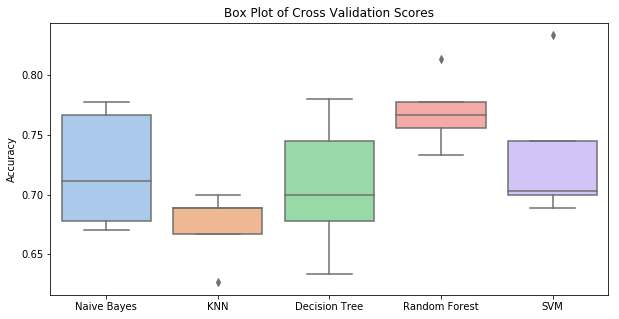

In [216]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_CVscoreFE, palette='pastel')
plt.title('Box Plot of Cross Validation Scores')
plt.ylabel('Accuracy')
plt.show()

In [204]:
falseneg = [8, 8, 18, 21, 11]
falsenegdf = pd.DataFrame(data=falseneg)
modelsdf = pd.DataFrame(data=models)
falsenegall = pd.concat([modelsdf, falsenegdf], axis=1)
falsenegall.columns = ['model', 'falseneg']
falsenegall

,model,falseneg
0,Naive Bayes,8
1,KNN,8
2,Decision Tree,18
3,Random Forest,21
4,SVM,11


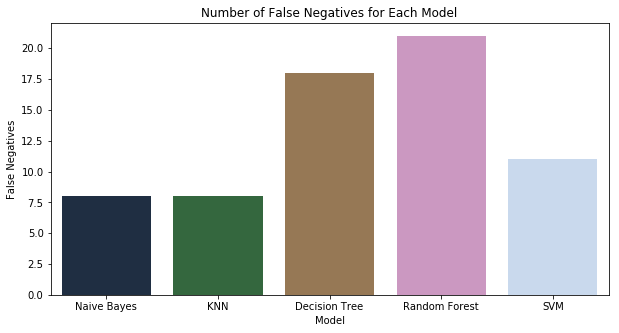

In [212]:
plt.figure(figsize=(10,5))
sns.barplot(x=models, y=falseneg, palette='cubehelix')
plt.title('Number of False Negatives for Each Model')
plt.xlabel('Model')
plt.ylabel('False Negatives')
plt.show()

## Conclusions
It's hard to determine which is the best model to use. Naive Bayes seems to have the greatest accuracy at 78.0% with the least amount of false positives, however, on cross validation Naive Bayes tends to show greater variance. Other models with low false positives are KNN, and support vector machines. KNN appears to have high accuracy as well at 75.6% with less variance during cross validation. However, CV accuracy score is the lowest for KNN. SVM seems to be somewhere in between.

Both Decision Tree and Random Forest do not appear to be acceptable due to the higher number of false positives, 11 and 17 respectively, even though Random Forest has a particularly high accuracy and low variance in cross validation.

#### Areas of Improvement
76% accuracy, however, would not be clinically useful in practice. A few barriers exist with this model.
1. The dataset is too small. With only 452 patients, and a near even distribution of arrhythmia to non-arrhythmia, more data would be helpful in improving the accuracy of this model. It would likely help reduce the variance between the different models during cross validation (as folds would have more data to generalize) and be more helpful in deciding which is best model to use.
2. The dataset contains a wide range of arrhythmias. Because of the size of our dataset, all arrhythmias were clustered together in a binary fashion. However, arrhythmia should be treated as a multi-classification problem. There simply were not enough of each type of arrythmia to accurately classify each. Different arrhythmias exist on separate parts of the heart's waveform and will have very different clinical treatments and outcome. This model cannot distinguish between A-Fib and a STEMI which occur on opposite ends of the heart (as well as the waveform).
3. The model could have more features. Information from labwork, patient medical history, family medical history, pain type, blood pressure, radiology scans, etc. are all things a clinician would use to create a differential diagnosis. More data from these areas could help this model more accurately determine the type of arrythmia.

## References

1. Choe J, Cha K, Choi J, et. al. The effects of prearrival direct notification call to interventional cardiologist on door-to-balloon time in patients who required secondary diversion with ST-elevation myocardial infarction for primary percutaneous coronary intervention. Hong Kong Journal of Emergency Medicine. 2018. https://journals.sagepub.com/doi/10.1177/1024907918794782

2. Fergusson DJ, Spies C, Hong RA, Young C, Beauvallet SR. Door-to-balloon time in acute ST segment elevation myocardial infarction--further experience. Hawaii J Med Public Health. 2012;71(11):320–323. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3497916/

3. Menees D, Peterson E, Wang Y, Curtis J, et. al. Door-to-Balloon Time and Mortality among Patients Undergoing Primary PCI. New England Journal of Medicine. 2013;369:901-909. https://www.nejm.org/doi/full/10.1056/NEJMoa1208200#article_citing_articles

4. Yamada T, Takahashi A, Mizuguchi Y, Hashimoto S, et. al. Impact of shorter door-to-balloon time on prognosis of patients with STEMI - single-center analysis with a large proportion of the patients treated within 30 min. 2019;34:97-104. https://link.springer.com/article/10.1007%2Fs12928-018-0521-1

